This notebook is part of the $\omega radlib$ documentation: https://docs.wrl.vis.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

# xarray GAMIC backend

In this example, we read GAMIC (HDF5) data files using the xradar `gamic` backend.

In [1]:
import glob
import wradlib as wrl
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import xradar as xd
import xarray as xr

try:
    get_ipython().run_line_magic("matplotlib inline")
except:
    plt.ion()

## Load GAMIC HDF5 Volume Data

In [2]:
fpath = "hdf5/DWD-Vol-2_99999_20180601054047_00.h5"
f = wrl.util.get_wradlib_data_file(fpath)
vol = xd.io.open_gamic_datatree(f)

## Inspect RadarVolume

In [3]:
display(vol)

<xarray.DataTree>
Group: /
│   Dimensions:              (sweep: 10)
│   Dimensions without coordinates: sweep
│   Data variables:
│       volume_number        int64 8B 0
│       platform_type        <U5 20B 'fixed'
│       instrument_type      <U5 20B 'radar'
│       time_coverage_start  <U20 80B '2018-06-01T05:40:47Z'
│       time_coverage_end    <U20 80B '2018-06-01T05:44:16Z'
│       longitude            float64 8B 6.457
│       altitude             float64 8B 310.0
│       latitude             float64 8B 50.93
│       sweep_group_name     (sweep) int64 80B 0 1 2 3 4 5 6 7 8 9
│       sweep_fixed_angle    (sweep) float64 80B 28.0 18.0 14.0 11.0 ... 3.1 1.7 0.6
│   Attributes:
│       Conventions:      None
│       instrument_name:  None
│       version:          None
│       title:            None
│       institution:      None
│       references:       None
│       source:           gamic
│       history:          None
│       comment:          im/exported using xradar
├── Group: /sweep_0
│       Dimensions:            (azimuth: 361, range: 360)
│       Coordinates:
│           elevation          (azimuth) float64 3kB ...
│           time               (azimuth) datetime64[ns] 3kB 2018-06-01T05:40:57.36300...
│         * range              (range) float32 1kB 50.0 150.0 ... 3.585e+04 3.595e+04
│           longitude          float64 8B ...
│           latitude           float64 8B ...
│           altitude           float64 8B ...
│         * azimuth            (azimuth) float64 3kB 0.5219 1.519 2.53 ... 358.5 359.5
│       Data variables: (12/17)
│           DBZH               (azimuth, range) float32 520kB ...
│           DBZV               (azimuth, range) float32 520kB ...
│           KDP                (azimuth, range) float32 520kB ...
│           RHOHV              (azimuth, range) float32 520kB ...
│           DBTH               (azimuth, range) float32 520kB ...
│           DBTV               (azimuth, range) float32 520kB ...
│           ...                 ...
│           PHIDP              (azimuth, range) float32 520kB ...
│           sweep_mode         <U20 80B ...
│           sweep_number       int64 8B ...
│           prt_mode           <U7 28B ...
│           follow_mode        <U7 28B ...
│           sweep_fixed_angle  float64 8B ...
├── Group: /sweep_1
│       Dimensions:            (azimuth: 361, range: 500)
│       Coordinates:
│           elevation          (azimuth) float64 3kB ...
│           time               (azimuth) datetime64[ns] 3kB 2018-06-01T05:41:10.99700...
│         * range              (range) float32 2kB 50.0 150.0 ... 4.985e+04 4.995e+04
│           longitude          float64 8B ...
│           latitude           float64 8B ...
│           altitude           float64 8B ...
│         * azimuth            (azimuth) float64 3kB 0.5246 1.533 2.543 ... 358.5 359.5
│       Data variables: (12/17)
│           DBZH               (azimuth, range) float32 722kB ...
│           DBZV               (azimuth, range) float32 722kB ...
│           KDP                (azimuth, range) float32 722kB ...
│           RHOHV              (azimuth, range) float32 722kB ...
│           DBTH               (azimuth, range) float32 722kB ...
│           DBTV               (azimuth, range) float32 722kB ...
│           ...                 ...
│           PHIDP              (azimuth, range) float32 722kB ...
│           sweep_mode         <U20 80B ...
│           sweep_number       int64 8B ...
│           prt_mode           <U7 28B ...
│           follow_mode        <U7 28B ...
│           sweep_fixed_angle  float64 8B ...
├── Group: /sweep_2
│       Dimensions:            (azimuth: 361, range: 620)
│       Coordinates:
│           elevation          (azimuth) float64 3kB ...
│           time               (azimuth) datetime64[ns] 3kB 2018-06-01T05:41:24.84300...
│         * range              (range) float32 2kB 50.0 150.0 ... 6.185e+04 6.195e+04
│           longitude          float64 8B ...
│           latitude  

## Inspect root group

The `sweep` dimension contains the number of scans in this radar volume. Further the dataset consists of variables (location coordinates, time_coverage) and attributes (Conventions, metadata).

In [4]:
vol.root

<xarray.DataTree>
Group: /
│   Dimensions:              (sweep: 10)
│   Dimensions without coordinates: sweep
│   Data variables:
│       volume_number        int64 8B 0
│       platform_type        <U5 20B 'fixed'
│       instrument_type      <U5 20B 'radar'
│       time_coverage_start  <U20 80B '2018-06-01T05:40:47Z'
│       time_coverage_end    <U20 80B '2018-06-01T05:44:16Z'
│       longitude            float64 8B 6.457
│       altitude             float64 8B 310.0
│       latitude             float64 8B 50.93
│       sweep_group_name     (sweep) int64 80B 0 1 2 3 4 5 6 7 8 9
│       sweep_fixed_angle    (sweep) float64 80B 28.0 18.0 14.0 11.0 ... 3.1 1.7 0.6
│   Attributes:
│       Conventions:      None
│       instrument_name:  None
│       version:          None
│       title:            None
│       institution:      None
│       references:       None
│       source:           gamic
│       history:          None
│       comment:          im/exported using xradar
├── Group: /sweep_0
│       Dimensions:            (azimuth: 361, range: 360)
│       Coordinates:
│           elevation          (azimuth) float64 3kB ...
│           time               (azimuth) datetime64[ns] 3kB 2018-06-01T05:40:57.36300...
│         * range              (range) float32 1kB 50.0 150.0 ... 3.585e+04 3.595e+04
│           longitude          float64 8B ...
│           latitude           float64 8B ...
│           altitude           float64 8B ...
│         * azimuth            (azimuth) float64 3kB 0.5219 1.519 2.53 ... 358.5 359.5
│       Data variables: (12/17)
│           DBZH               (azimuth, range) float32 520kB ...
│           DBZV               (azimuth, range) float32 520kB ...
│           KDP                (azimuth, range) float32 520kB ...
│           RHOHV              (azimuth, range) float32 520kB ...
│           DBTH               (azimuth, range) float32 520kB ...
│           DBTV               (azimuth, range) float32 520kB ...
│           ...                 ...
│           PHIDP              (azimuth, range) float32 520kB ...
│           sweep_mode         <U20 80B ...
│           sweep_number       int64 8B ...
│           prt_mode           <U7 28B ...
│           follow_mode        <U7 28B ...
│           sweep_fixed_angle  float64 8B ...
├── Group: /sweep_1
│       Dimensions:            (azimuth: 361, range: 500)
│       Coordinates:
│           elevation          (azimuth) float64 3kB ...
│           time               (azimuth) datetime64[ns] 3kB 2018-06-01T05:41:10.99700...
│         * range              (range) float32 2kB 50.0 150.0 ... 4.985e+04 4.995e+04
│           longitude          float64 8B ...
│           latitude           float64 8B ...
│           altitude           float64 8B ...
│         * azimuth            (azimuth) float64 3kB 0.5246 1.533 2.543 ... 358.5 359.5
│       Data variables: (12/17)
│           DBZH               (azimuth, range) float32 722kB ...
│           DBZV               (azimuth, range) float32 722kB ...
│           KDP                (azimuth, range) float32 722kB ...
│           RHOHV              (azimuth, range) float32 722kB ...
│           DBTH               (azimuth, range) float32 722kB ...
│           DBTV               (azimuth, range) float32 722kB ...
│           ...                 ...
│           PHIDP              (azimuth, range) float32 722kB ...
│           sweep_mode         <U20 80B ...
│           sweep_number       int64 8B ...
│           prt_mode           <U7 28B ...
│           follow_mode        <U7 28B ...
│           sweep_fixed_angle  float64 8B ...
├── Group: /sweep_2
│       Dimensions:            (azimuth: 361, range: 620)
│       Coordinates:
│           elevation          (azimuth) float64 3kB ...
│           time               (azimuth) datetime64[ns] 3kB 2018-06-01T05:41:24.84300...
│         * range              (range) float32 2kB 50.0 150.0 ... 6.185e+04 6.195e+04
│           longitude          float64 8B ...
│           latitude  

## Inspect sweep group(s)

The sweep-groups can be accessed via their respective keys. The dimensions consist of `range` and `time` with added coordinates `azimuth`, `elevation`, `range` and `time`. There will be variables like radar moments (DBZH etc.) and sweep-dependend metadata (like `fixed_angle`, `sweep_mode` etc.).

In [5]:
display(vol["sweep_0"])

<xarray.DataTree 'sweep_0'>
Group: /sweep_0
    Dimensions:            (sweep: 10, azimuth: 361, range: 360)
    Coordinates:
        elevation          (azimuth) float64 3kB ...
        time               (azimuth) datetime64[ns] 3kB 2018-06-01T05:40:57.36300...
      * range              (range) float32 1kB 50.0 150.0 ... 3.585e+04 3.595e+04
        longitude          float64 8B ...
        latitude           float64 8B ...
        altitude           float64 8B ...
      * azimuth            (azimuth) float64 3kB 0.5219 1.519 2.53 ... 358.5 359.5
    Dimensions without coordinates: sweep
    Data variables: (12/17)
        DBZH               (azimuth, range) float32 520kB ...
        DBZV               (azimuth, range) float32 520kB ...
        KDP                (azimuth, range) float32 520kB ...
        RHOHV              (azimuth, range) float32 520kB ...
        DBTH               (azimuth, range) float32 520kB ...
        DBTV               (azimuth, range) float32 520kB ...
        ...                 ...
        PHIDP              (azimuth, range) float32 520kB ...
        sweep_mode         <U20 80B ...
        sweep_number       int64 8B ...
        prt_mode           <U7 28B ...
        follow_mode        <U7 28B ...
        sweep_fixed_angle  float64 8B ...

## Georeferencing

In [6]:
swp = vol["sweep_0"].ds.copy()
swp = swp.assign_coords(sweep_mode=swp.sweep_mode)

In [7]:
swp = swp.wrl.georef.georeference()
display(swp)

<xarray.Dataset> Size: 12MB
Dimensions:            (azimuth: 361, range: 360)
Coordinates: (12/15)
    sweep_mode         <U20 80B 'azimuth_surveillance'
    elevation          (azimuth) float64 3kB 28.0 28.0 28.0 ... 28.0 28.0 28.0
    time               (azimuth) datetime64[ns] 3kB 2018-06-01T05:40:57.36300...
  * range              (range) float32 1kB 50.0 150.0 ... 3.585e+04 3.595e+04
    longitude          float64 8B 6.457
    latitude           float64 8B 50.93
    ...                 ...
    y                  (azimuth, range) float64 1MB 44.14 132.4 ... 3.168e+04
    z                  (azimuth, range) float64 1MB 333.5 380.4 ... 1.725e+04
    gr                 (azimuth, range) float64 1MB 44.11 132.4 ... 3.168e+04
    rays               (azimuth, range) float64 1MB 0.5219 0.5219 ... 359.5
    bins               (azimuth, range) float32 520kB 50.0 150.0 ... 3.595e+04
    crs_wkt            int64 8B 0
Data variables: (12/16)
    DBZH               (azimuth, range) float32 520kB ...
    DBZV               (azimuth, range) float32 520kB ...
    KDP                (azimuth, range) float32 520kB ...
    RHOHV              (azimuth, range) float32 520kB ...
    DBTH               (azimuth, range) float32 520kB ...
    DBTV               (azimuth, range) float32 520kB ...
    ...                 ...
    WRADV              (azimuth, range) float32 520kB ...
    PHIDP              (azimuth, range) float32 520kB ...
    sweep_number       int64 8B ...
    prt_mode           <U7 28B ...
    follow_mode        <U7 28B ...
    sweep_fixed_angle  float64 8B ...

## Inspect radar moments

The DataArrays can be accessed by key or by attribute. Each DataArray has dimensions and coordinates of it's parent dataset. There are attributes connected which are defined by ODIM_H5 standard.

In [8]:
display(swp.DBZH)

<xarray.DataArray 'DBZH' (azimuth: 361, range: 360)> Size: 520kB
[129960 values with dtype=float32]
Coordinates: (12/15)
    sweep_mode  <U20 80B 'azimuth_surveillance'
    elevation   (azimuth) float64 3kB 28.0 28.0 28.0 28.0 ... 28.0 28.0 28.0
    time        (azimuth) datetime64[ns] 3kB 2018-06-01T05:40:57.363000 ... 2...
  * range       (range) float32 1kB 50.0 150.0 250.0 ... 3.585e+04 3.595e+04
    longitude   float64 8B 6.457
    latitude    float64 8B 50.93
    ...          ...
    y           (azimuth, range) float64 1MB 44.14 132.4 ... 3.159e+04 3.168e+04
    z           (azimuth, range) float64 1MB 333.5 380.4 ... 1.72e+04 1.725e+04
    gr          (azimuth, range) float64 1MB 44.11 132.4 ... 3.159e+04 3.168e+04
    rays        (azimuth, range) float64 1MB 0.5219 0.5219 ... 359.5 359.5
    bins        (azimuth, range) float32 520kB 50.0 150.0 ... 3.595e+04
    crs_wkt     int64 8B 0
Attributes:
    format:         UV8
    is_dft:         0
    unit:           dBZ
    long_name:      Equivalent reflectivity factor H
    units:          dBZ
    standard_name:  radar_equivalent_reflectivity_factor_h
    _Undetect:      0.0

## Create simple plot

Using xarray features a simple plot can be created like this. Note the `sortby('time')` method, which sorts the radials by time.

For more details on plotting radar data see under [Visualization](../../plotting.ipynb).

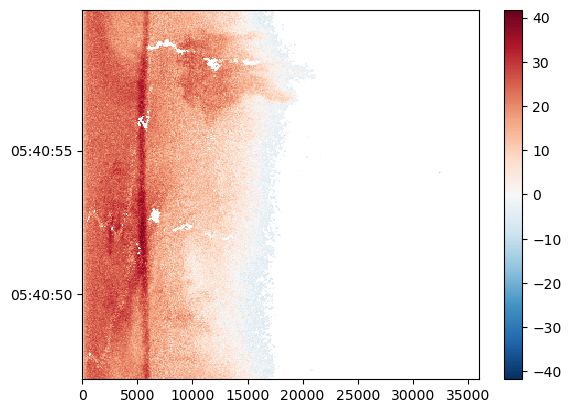

In [9]:
swp.DBZH.sortby("time").plot(x="range", y="time", add_labels=False)

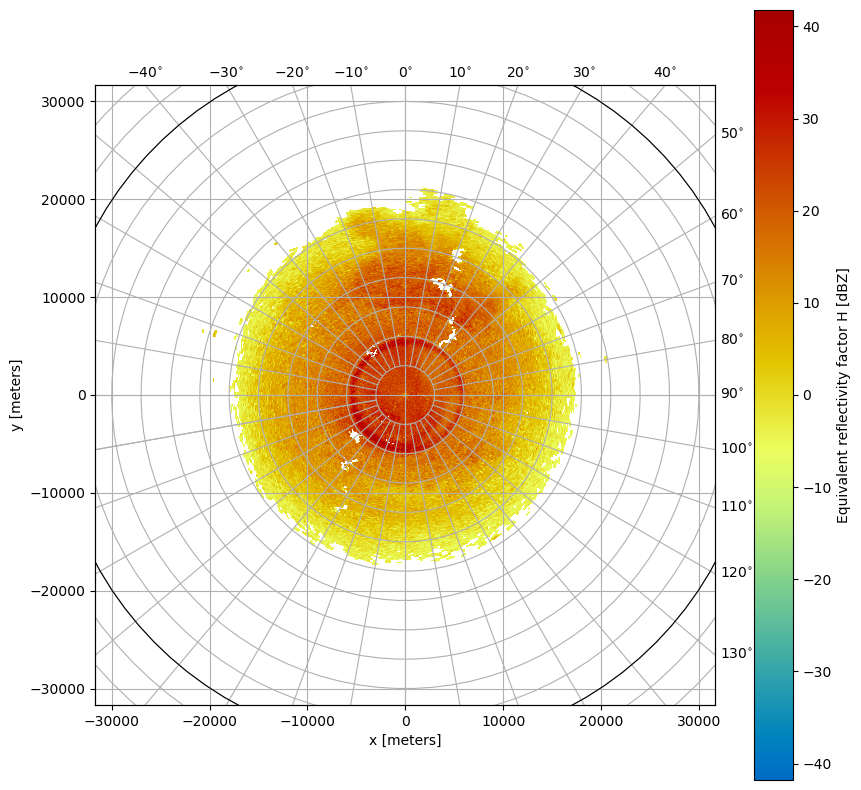

In [10]:
fig = plt.figure(figsize=(10, 10))
pm = swp.DBZH.wrl.vis.plot(crs={"latmin": 3e3}, fig=fig)

## Retrieve explicit group


In [11]:
swp_b = xr.open_dataset(
    f, engine="gamic", group="sweep_9", backend_kwargs=dict(reindex_angle=False)
)
display(swp_b)

<xarray.Dataset> Size: 17MB
Dimensions:            (azimuth: 360, range: 1000)
Coordinates:
    elevation          (azimuth) float64 3kB ...
    time               (azimuth) datetime64[ns] 3kB ...
  * range              (range) float32 4kB 75.0 225.0 ... 1.498e+05 1.499e+05
    longitude          float64 8B ...
    latitude           float64 8B ...
    altitude           float64 8B ...
  * azimuth            (azimuth) float64 3kB 0.5109 1.519 2.519 ... 358.5 359.5
Data variables: (12/17)
    DBZH               (azimuth, range) float32 1MB ...
    DBZV               (azimuth, range) float32 1MB ...
    KDP                (azimuth, range) float32 1MB ...
    RHOHV              (azimuth, range) float32 1MB ...
    DBTH               (azimuth, range) float32 1MB ...
    DBTV               (azimuth, range) float32 1MB ...
    ...                 ...
    PHIDP              (azimuth, range) float32 1MB ...
    sweep_mode         <U20 80B ...
    sweep_number       int64 8B ...
    prt_mode           <U7 28B ...
    follow_mode        <U7 28B ...
    sweep_fixed_angle  float64 8B ...
Attributes:
    source:         gamic
    ant_gain_h:     43
    ant_gain_v:     43
    noise_power_h:  -3.40133
    noise_power_v:  -3.13518
    rx_loss_h:      3
    rx_loss_v:      3